# Default of Credit Card Clients Dataset

### Create ML model to predict default

##### NOTE: The dataset from [Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) is different from the dataset from the AWS Eng. Amgad e-mail (Apparantly it's easier) so I will try the Kaggle dataset first then if it works fine I will try the one in the email.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
  
df = pd.read_csv('UCI_Credit_Card.csv')

print('The shape of the training dataset is:', df.shape)

The shape of the training dataset is: (30000, 25)


# Dataset Information
#### This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Content
#### There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

# Inspiration
#### Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?

Which variables are the strongest predictors of default payment?

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()
# We will find out that all the values are numeric values no text no categorical so cool xD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#check if there are NULLs (i already know there's non)
df.isnull().sum(axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
# Number of unique elements in dataset
df.nunique()
# SEX is boolean so maybe i should hot-encode it? will see 

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

## BEFORE we get into anything let's try a poor base model and see what happens

------------------------------------------------------------------
#### BASE BEGINNING

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

In [10]:
X_train = train_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_train = train_data[['default.payment.next.month']]

X_test = test_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_test = test_data[['default.payment.next.month']]


X_val = test_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_val = test_data[['default.payment.next.month']]


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

[[17773   884]
 [ 2809  2534]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     18657
           1       0.74      0.47      0.58      5343

    accuracy                           0.85     24000
   macro avg       0.80      0.71      0.74     24000
weighted avg       0.84      0.85      0.83     24000

Accuracy (training): 0.846125


In [12]:
# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))


[[885  59]
 [149 107]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       944
           1       0.64      0.42      0.51       256

    accuracy                           0.83      1200
   macro avg       0.75      0.68      0.70      1200
weighted avg       0.81      0.83      0.81      1200

Accuracy (validation): 0.8266666666666667


In [13]:
# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))


[[885  59]
 [149 107]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       944
           1       0.64      0.42      0.51       256

    accuracy                           0.83      1200
   macro avg       0.75      0.68      0.70      1200
weighted avg       0.81      0.83      0.81      1200

Accuracy (test): 0.8266666666666667


###### Question: why validation and test have the same accuracy?
###### NOTE: what we care about most here is F1 i believe.

#### BASE ENDING
---------------------------------------------------

### NOTE: DO NOT run the plotting Cells unless you have plenty plenty of time haha
#### in fact the countplot does not help much

In [14]:
#check for outliers
import seaborn as sns

# for i, col in enumerate(df.columns):
#     if col.find("AMT")==1:
#         continue
#     else:
#         plt.figure(i)
#         sns.countplot(x=col, data=df)
#sns.boxplot(ID)

#### Conclusion 1:
#### outliers conclusion: i can see some data away from the general trend like: in MARRIAGE=0? PAY_0=4? and so on.
#### but does that mean they're outliers? i need to understand the business
#### for my understandning the marriage is the only outlier
#### NOTE: why education has 2 values for unknown?!

In [15]:
# for i, col in enumerate(df.columns):
#     if "AMT" in col:
#         continue
#     else:
#         plt.figure(i)
#         sns.boxplot(x=df[col])

<ipython-input-16-f5b855239e4d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


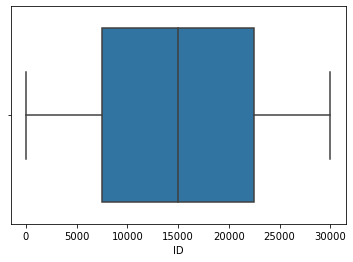

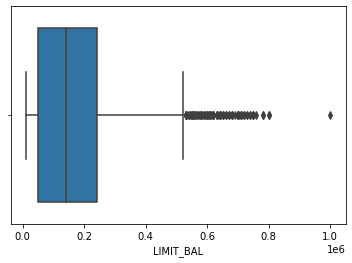

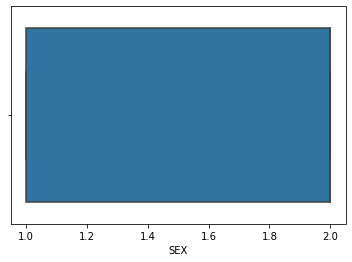

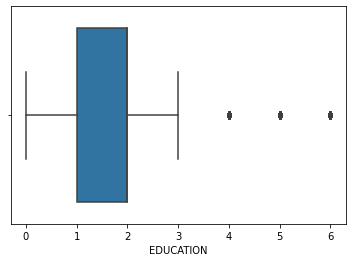

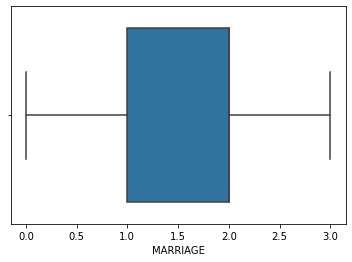

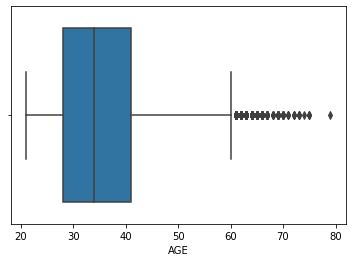

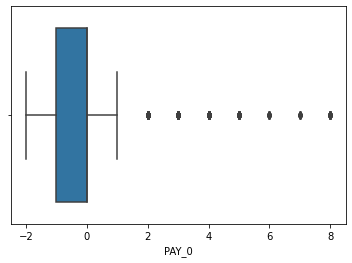

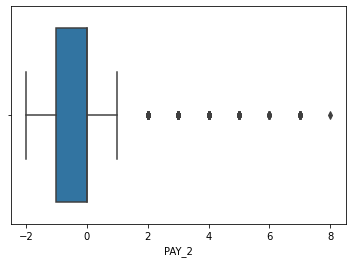

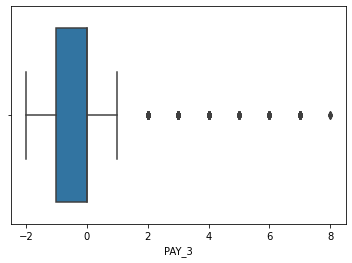

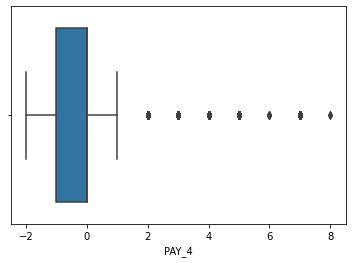

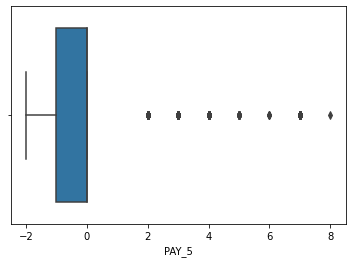

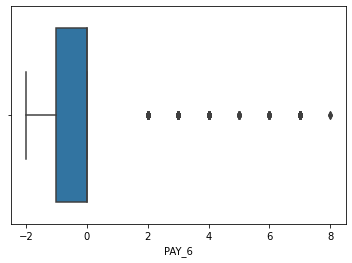

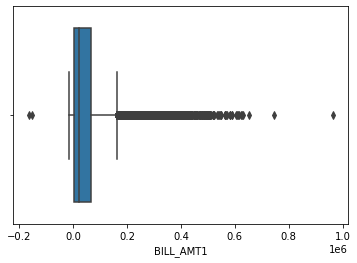

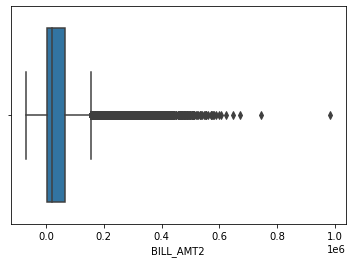

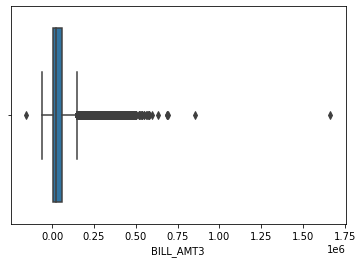

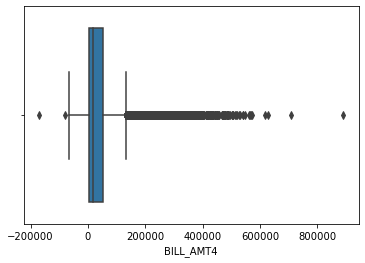

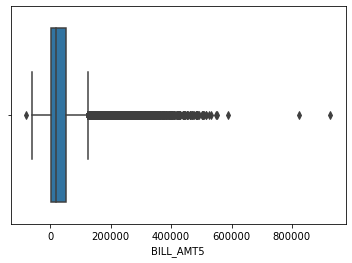

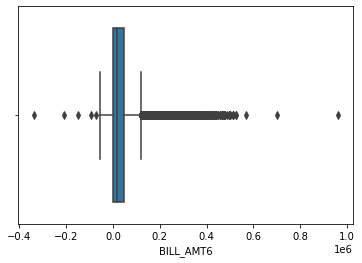

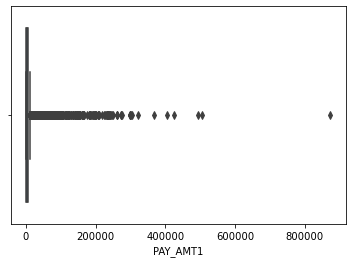

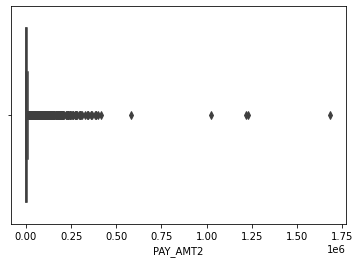

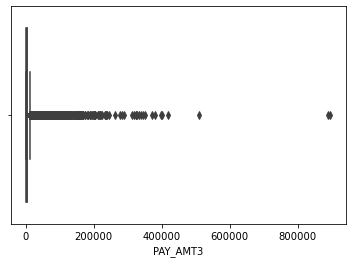

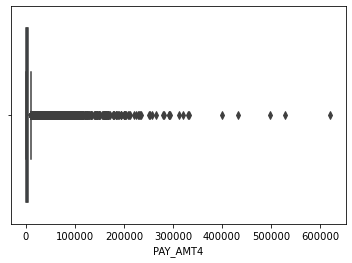

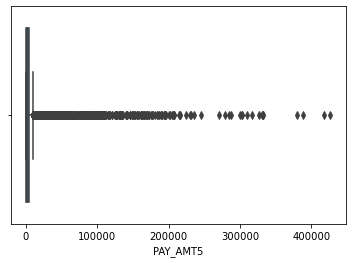

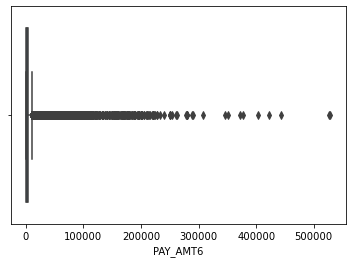

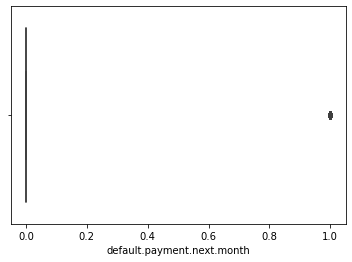

In [16]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(x=df[col])

#### Conclusion 2:

##### A LOT OF outliers. Let's handle each column individually.

In [17]:
#from this step we're going to change in the dataframe itself so i'd rather apply the changes to a copy of it
df_v1 = df.copy()

In [18]:

#ID cool.

#LIMIT BAL > 0.8le6  <-- remove but it could also be just a wealthy person..


In [19]:
#EDUCATION let's make all the 0s, 50 6s (unknowns) into 4s (others). other than that i don't believe they're outliers

fil = (df_v1.EDUCATION == 5) | (df_v1.EDUCATION == 6) | (df_v1.EDUCATION == 0)
df_v1.loc[fil,'EDUCATION'] = 4
df_v1['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [20]:
#MARRIAGE let's make all the 0s (idk what it is) a 3 (other)

fil = (df_v1.MARRIAGE == 0)
df_v1.loc[fil,'MARRIAGE'] = 3
df_v1['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [21]:
#STOLEN FUNCTION
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

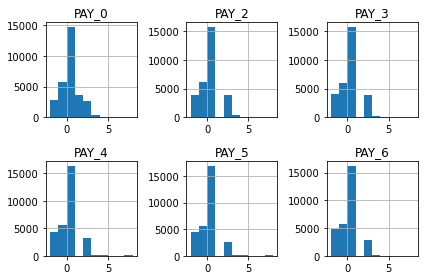

In [22]:
#AGE: well.. nothing really says anything about age limit.. i will not remove anything

#remove the follwing:
    #PAY_0: <-1 or >9 except ==0
    #PAY_2: <-1 or >9 except ==0
    #PAY_3: <-1 or >9 except ==0
    #PAY_4: <-1 or >9 except ==0
    #PAY_5: <-1 or >9 except ==0
    #PAY_6: <-1 or >9 except ==0

#NOOOOTE: after checking the discussion turns out the -2,0 values in the PAY_X columns are fine :/
#NOOOOOOOTE: another source says we can put the -2s and -1s to 0s and i like that because after looking at the counter plots it seems right
# BUT HE doesn't apply it to PAY_0. However, I will

fil = (df_v1.PAY_0 == -1) | (df_v1.PAY_0 == -2)
df_v1.loc[fil,'PAY_0'] = 0

fil = (df_v1.PAY_2 == -1) | (df_v1.PAY_2 == -2)
df_v1.loc[fil,'PAY_2'] = 0

fil = (df_v1.PAY_3 == -1) | (df_v1.PAY_3 == -2)
df_v1.loc[fil,'PAY_3'] = 0

fil = (df_v1.PAY_4 == -1) | (df_v1.PAY_4 == -2)
df_v1.loc[fil,'PAY_4'] = 0

fil = (df_v1.PAY_5 == -1) | (df_v1.PAY_5 == -2)
df_v1.loc[fil,'PAY_5'] = 0

fil = (df_v1.PAY_6 == -1) | (df_v1.PAY_6 == -2)
df_v1.loc[fil,'PAY_6'] = 0

to_view = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(to_view, to_view.columns, 2, 3, 10)

In [23]:
df_v1.PAY_3.value_counts()

0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64

In [24]:
df_v1.BILL_AMT6.value_counts()

0.0        4020
390.0       207
780.0        86
150.0        78
316.0        77
           ... 
59922.0       1
13080.0       1
5323.0        1
15474.0       1
25654.0       1
Name: BILL_AMT6, Length: 20604, dtype: int64

In [25]:
# I DON'T UNDERSTAND THE NEGATIVE VALUES IN THE FOLLOWING :((  -- THERE'S NON NEGATIVES YA YOMNA.
#BILL_AMT1 > 0.7le6 <-- remove

#BILL_AMT2 > 0.7le6 <-- remove

## regarding these very large numbers let's just assume they're wealthy people case nobody said anything about a money range


Text(0.5, 1.0, 'dataset correlation')

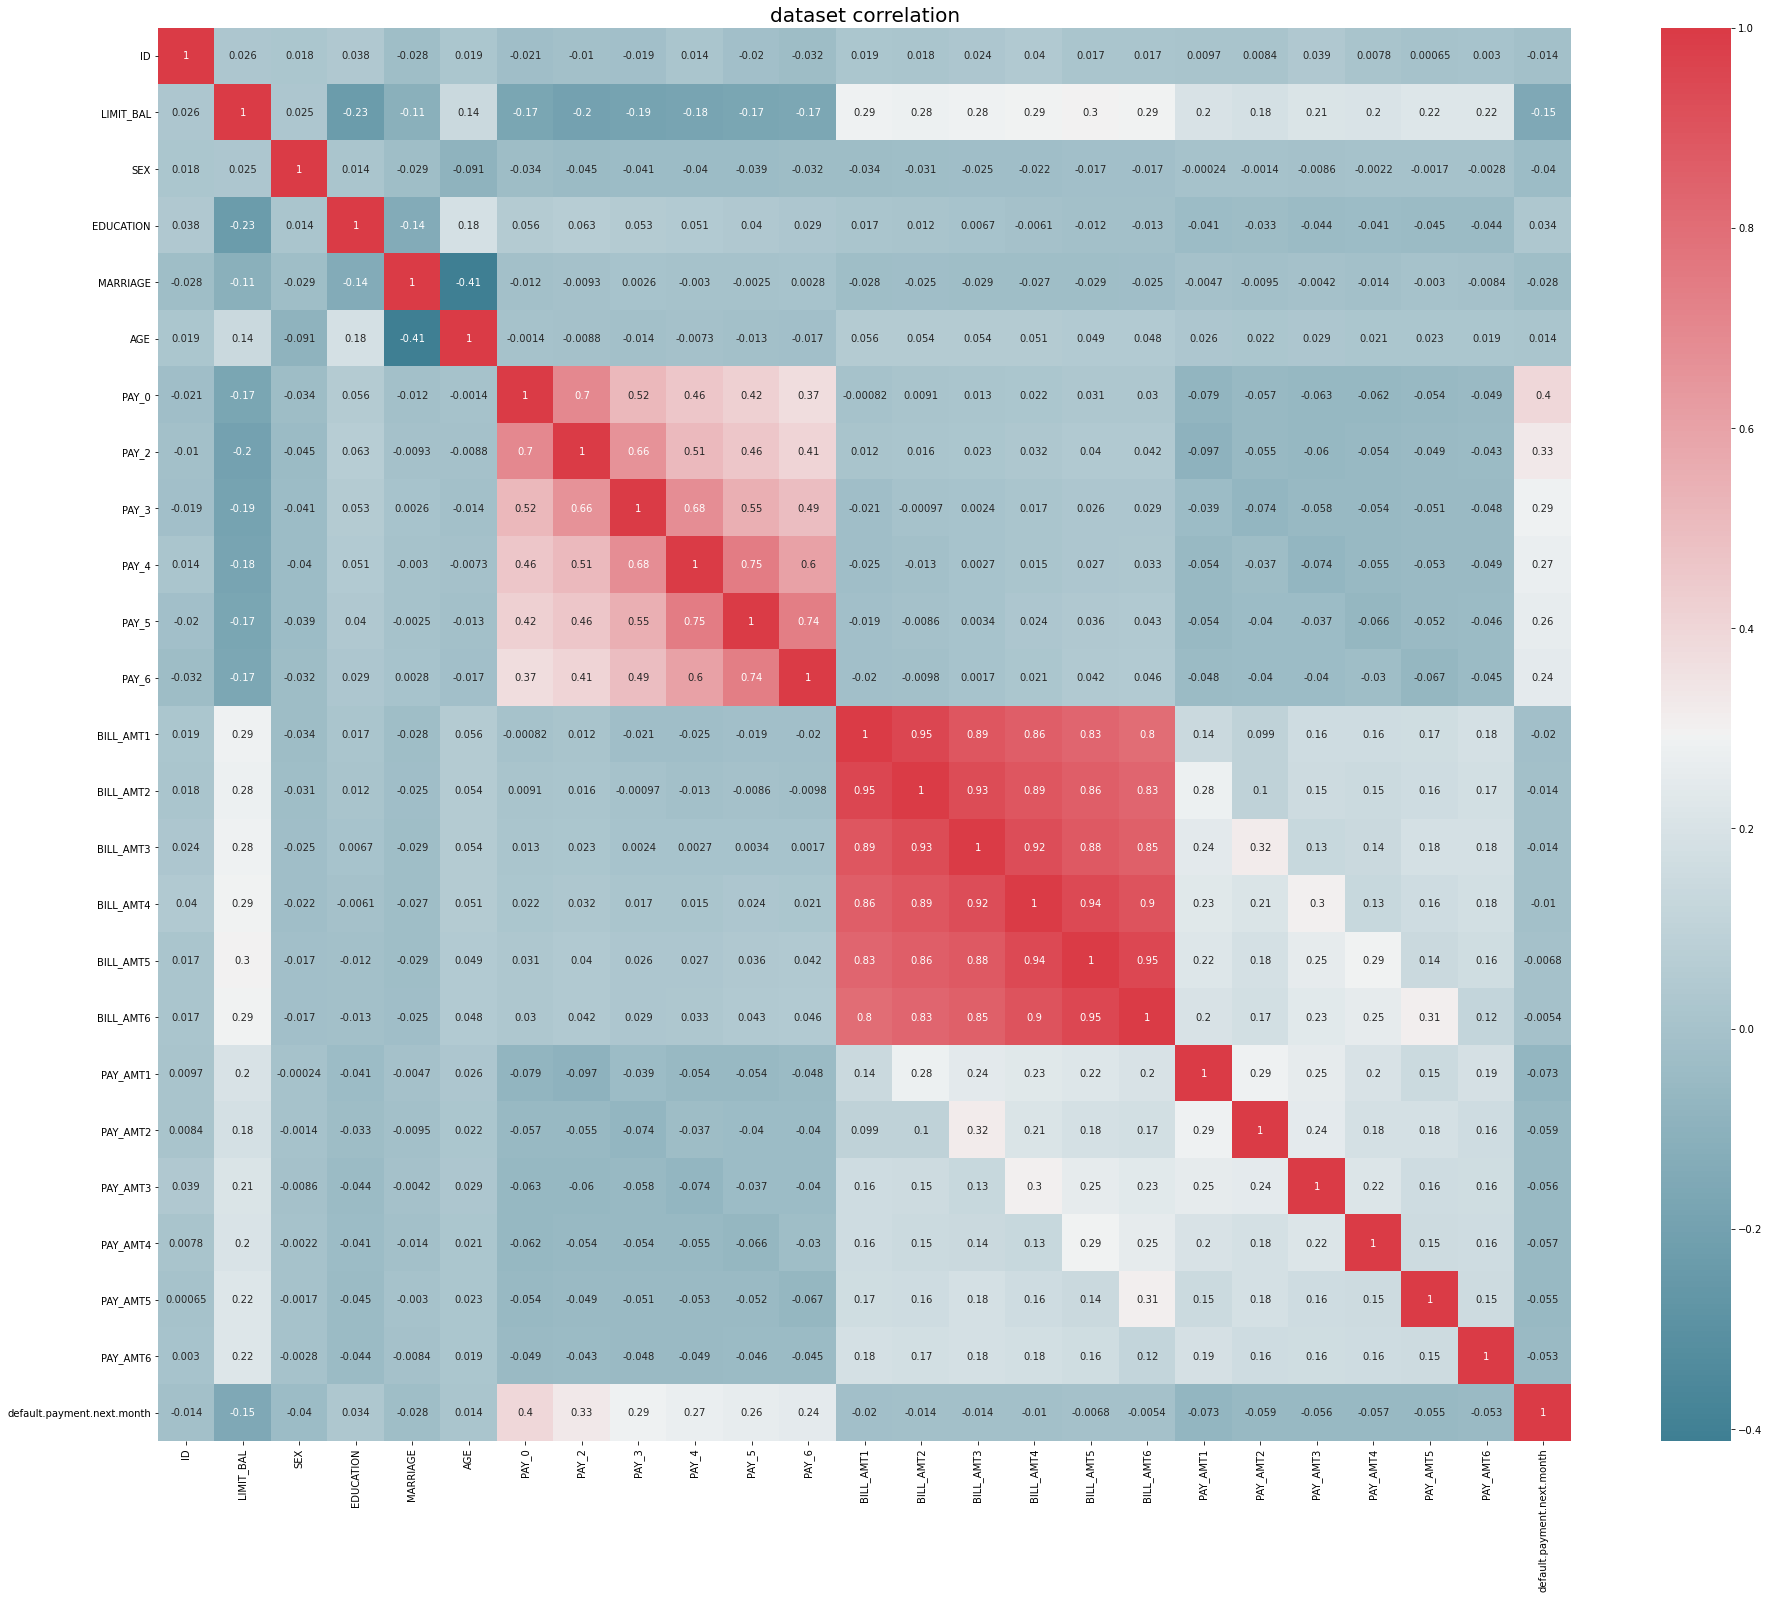

In [26]:
#check for correlation
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = df_v1.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

#### Correlation notes: 
 (BILL_AMT1, BILL_AMT2)
 (BILL_AMT1, BILL_AMT3) well appraently all the BILL_AMTX are highly correlated so i will only keep one of them and see what happens.

In [27]:
useful_columns = ['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                  'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_5',
                  'BILL_AMT1',
                  'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
                 ]
unuseful_columns = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
label_colum = ['default.payment.next.month']  # very weird name i should change it to target

df_v1 = df_v1.rename(columns={'default.payment.next.month': 'target'})
label_colum = ['target']

In [28]:
#drop the useless columns

df_v1.drop(unuseful_columns, axis=1, inplace=True)

In [29]:
#check for duplicates
(df_v1.drop_duplicates(inplace=False)).shape
#TURNS out no duplicates

(30000, 20)

In [30]:
# Check target variable balance
df_v1['target'].value_counts()

0    23364
1     6636
Name: target, dtype: int64

In [61]:
## la5bta check
df_v1['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

###### So it looks like the data is not balanced at all.. let's keep this in mind along with the SEX and Marriage hot-encoding part. Will see what to do about it later

Text(0.5, 1.0, 'dataset correlation')

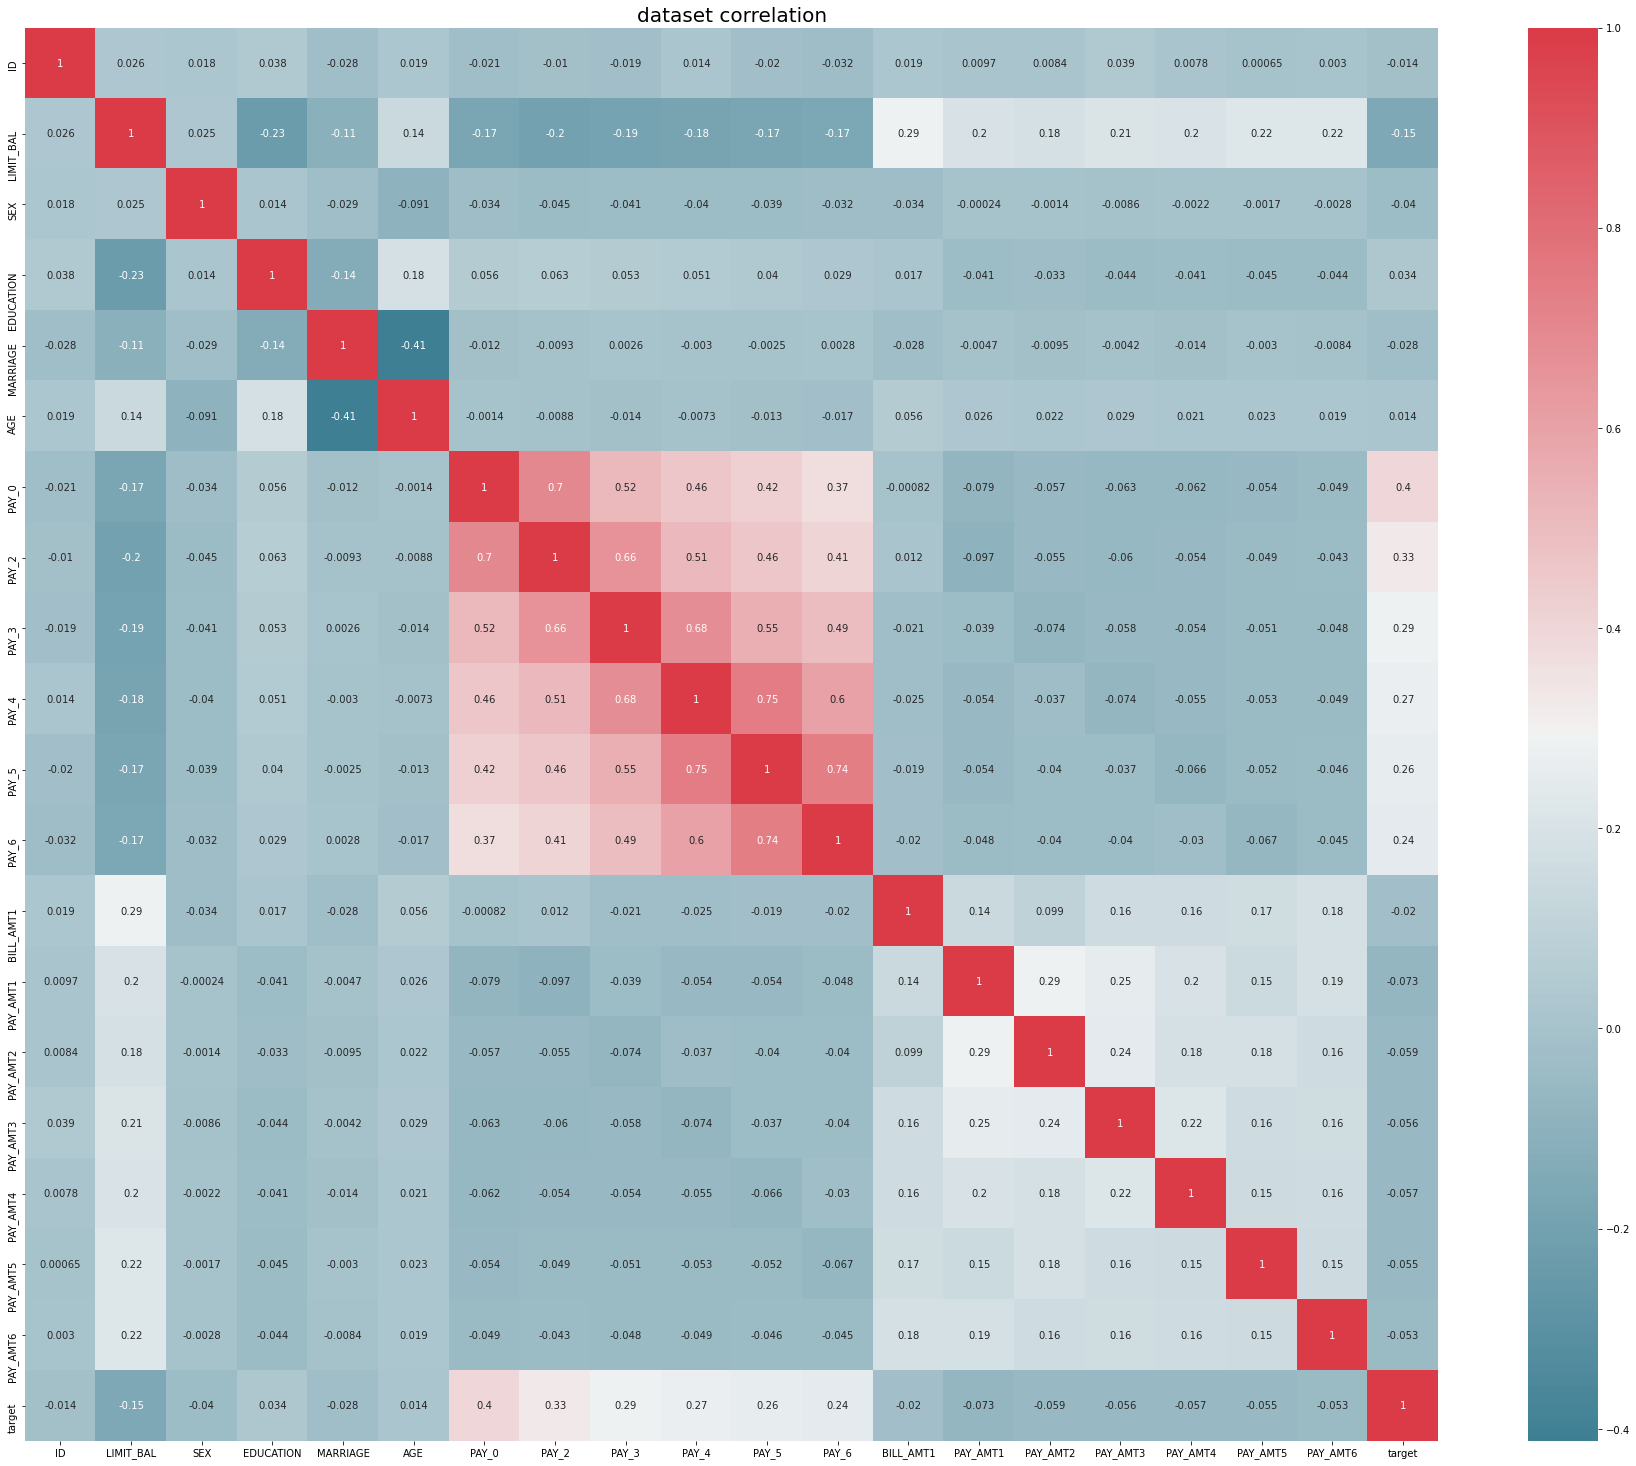

In [31]:
#check for correlation again
f, ax = plt.subplots(figsize=(32, 26))
corr = df_v1.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

--------------
### Training Trial 2 BEGINNING

In [32]:
train_data, test_data = train_test_split(df_v1, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

In [33]:
X_train = train_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_train = train_data[['target']]

X_test = test_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_test = test_data[['target']]


X_val = test_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_val = test_data[['target']]


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

[[17755   902]
 [ 2813  2530]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     18657
           1       0.74      0.47      0.58      5343

    accuracy                           0.85     24000
   macro avg       0.80      0.71      0.74     24000
weighted avg       0.84      0.85      0.83     24000

Accuracy (training): 0.8452083333333333


In [35]:
# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))


[[885  59]
 [156 100]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       944
           1       0.63      0.39      0.48       256

    accuracy                           0.82      1200
   macro avg       0.74      0.66      0.69      1200
weighted avg       0.80      0.82      0.80      1200

Accuracy (validation): 0.8208333333333333


In [36]:
# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))


[[885  59]
 [156 100]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       944
           1       0.63      0.39      0.48       256

    accuracy                           0.82      1200
   macro avg       0.74      0.66      0.69      1200
weighted avg       0.80      0.82      0.80      1200

Accuracy (test): 0.8208333333333333


#### Haha not a great improvement

### Training Trial 2 END
------------

#### Let's try to balance the data and try again

In [37]:
from imblearn.over_sampling import SMOTE 

X = df_v1.drop(['target'], axis=1).values
y = df_v1['target'].values # Enter your code here

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)


/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Original Distribution of the dataset')

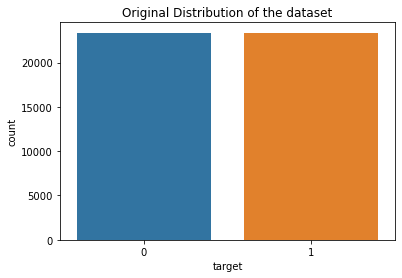

In [38]:
#Convert the new dataset to a Pandas DataFrame and check the shape and distribution of the data.
smote_df = pd.DataFrame(X_res, 
                        columns = df_v1.drop(['target'], axis=1).columns) 
smote_df['target'] = y_res 

sns.countplot(smote_df['target'])
plt.title('Original Distribution of the dataset')

In [39]:
smote_df.shape

(46728, 20)

In [47]:
smote_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [62]:
smote_df.MARRIAGE.value_counts() , smote_df.SEX.value_counts()

(2.000000    20191
 1.000000    17710
 3.000000      380
 1.538049        1
 1.593358        1
             ...  
 1.034051        1
 1.704587        1
 1.330823        1
 1.859102        1
 1.266148        1
 Name: MARRIAGE, Length: 8450, dtype: int64,
 2.000000    23634
 1.000000    15123
 1.707933        1
 1.365555        1
 1.711073        1
             ...  
 1.583633        1
 1.017729        1
 1.069718        1
 1.502845        1
 1.272070        1
 Name: SEX, Length: 7973, dtype: int64)

### Good, try the training again!
--------------------------
## Trial 3 !

In [40]:
train_data, test_data = train_test_split(smote_df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

X_train = train_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_train = train_data[['target']]

X_test = test_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_test = test_data[['target']]


X_val = test_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y_val = test_data[['target']]



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

[[17518  1211]
 [ 3571 15082]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     18729
           1       0.93      0.81      0.86     18653

    accuracy                           0.87     37382
   macro avg       0.88      0.87      0.87     37382
weighted avg       0.88      0.87      0.87     37382

Accuracy (training): 0.8720774704403189


In [42]:
# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))


[[862  59]
 [207 742]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       921
           1       0.93      0.78      0.85       949

    accuracy                           0.86      1870
   macro avg       0.87      0.86      0.86      1870
weighted avg       0.87      0.86      0.86      1870

Accuracy (validation): 0.8577540106951872


In [43]:
# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))


[[862  59]
 [207 742]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       921
           1       0.93      0.78      0.85       949

    accuracy                           0.86      1870
   macro avg       0.87      0.86      0.86      1870
weighted avg       0.87      0.86      0.86      1870

Accuracy (test): 0.8577540106951872


### Good results!

## Trial 3 Ends!
----------------------

### Now it's time to consider one-hot encoding for SEX and MARRIAGE

In [63]:
# first let's just keep the smote_df safe before we change it entirely

df_v2 = df_v1.copy()

In [64]:
df_v2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [65]:
df_v2['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [66]:
categorical_columns = ['SEX', 'MARRIAGE']

for c in categorical_columns:
    df_v2[c] = df_v2[c].astype('category') 

In [67]:
df_v2['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [68]:
data_dummies = pd.get_dummies(df_v2[categorical_columns], drop_first=True) 
df_v2 = pd.concat([df_v2, data_dummies], axis = 1)
df_v2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,SEX_2,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0
1,2,120000.0,2,2,2,26,0,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,1,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,1,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0


In [69]:
df_v2.drop(categorical_columns,axis=1, inplace=True)
df_v2.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,SEX_2,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,2,24,2,2,0,0,0,0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0
1,2,120000.0,2,26,0,2,0,0,0,2,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,1,0
2,3,90000.0,2,34,0,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,1,0
3,4,50000.0,2,37,0,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0
4,5,50000.0,2,57,0,0,0,0,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0


In [70]:
df_v2.shape

(30000, 21)

In [71]:
### JUST TO TRY RE-DO THE SAMPLING


X = df_v2.drop(['target'], axis=1).values
y = df_v2['target'].values 

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)



/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Original Distribution of the dataset')

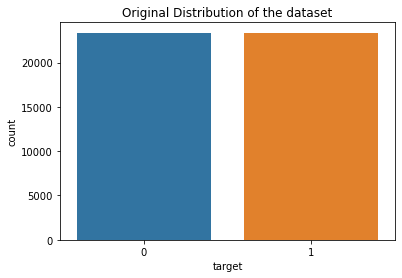

In [73]:
#Convert the new dataset to a Pandas DataFrame and check the shape and distribution of the data.
smote_df_v2 = pd.DataFrame(X_res, 
                        columns = df_v2.drop(['target'], axis=1).columns) 
smote_df_v2['target'] = y_res 

sns.countplot(smote_df['target'])
plt.title('Original Distribution of the dataset')

In [74]:
smote_df_v2.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,MARRIAGE_2,MARRIAGE_3,target
0,1.0,20000.0,2.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,2.0,120000.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,1.0,0.0,1
2,3.0,90000.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1.0,1.0,0.0,0
3,4.0,50000.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1.0,0.0,0.0,0
4,5.0,50000.0,2.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,0.0,0.0,0


In [75]:
smote_df_v2.shape

(46728, 21)

------
## Trial 4 !

In [76]:
train_data, test_data = train_test_split(smote_df_v2, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

X_train = train_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_train = train_data[['target']]

X_test = test_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_test = test_data[['target']]


X_val = test_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_val = test_data[['target']]



In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

[[17454  1275]
 [ 3359 15294]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     18729
           1       0.92      0.82      0.87     18653

    accuracy                           0.88     37382
   macro avg       0.88      0.88      0.88     37382
weighted avg       0.88      0.88      0.88     37382

Accuracy (training): 0.8760365951527473


In [78]:
# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))


[[852  69]
 [188 761]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       921
           1       0.92      0.80      0.86       949

    accuracy                           0.86      1870
   macro avg       0.87      0.86      0.86      1870
weighted avg       0.87      0.86      0.86      1870

Accuracy (validation): 0.8625668449197861


In [79]:
# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))


[[852  69]
 [188 761]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       921
           1       0.92      0.80      0.86       949

    accuracy                           0.86      1870
   macro avg       0.87      0.86      0.86      1870
weighted avg       0.87      0.86      0.86      1870

Accuracy (test): 0.8625668449197861


##### Great even better results!
###### so  we should keep our  'smote_df_v2' dataframe safe cause it's got the best stuff so far i guess

In [81]:
best_df = smote_df_v2.copy()

#### I think it's time to try other models

In [94]:
train_data, test_data = train_test_split(best_df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

X_train = train_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_train = train_data[['target']]

X_test = test_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_test = test_data[['target']]


X_val = test_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_val = test_data[['target']]

# _______________________________


### Random Forest Classifier

In [95]:

#from sklearn.tree import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', RandomForestClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification

print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))
print('________________')
#_________________________________

# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))
print('________________')
#________________________________

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))
print('________________')

/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[[17673  1056]
 [ 3328 15325]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     18729
           1       0.94      0.82      0.87     18653

    accuracy                           0.88     37382
   macro avg       0.89      0.88      0.88     37382
weighted avg       0.89      0.88      0.88     37382

Accuracy (training): 0.8827243058156332
________________
[[864  57]
 [182 767]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       921
           1       0.93      0.81      0.87       949

    accuracy                           0.87      1870
   macro avg       0.88      0.87      0.87      1870
weighted avg       0.88      0.87      0.87      1870

Accuracy (validation): 0.872192513368984
________________
[[864  57]
 [182 767]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       921
           1       0.93      0.81      0.87  

### Gradient Boosting Classifier

In [85]:

#from sklearn.tree import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', GradientBoostingClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification

print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))
print('________________')
#_________________________________

# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))
print('________________')
#________________________________

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))
print('________________')

/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[18536   193]
 [ 1615 17038]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18729
           1       0.99      0.91      0.95     18653

    accuracy                           0.95     37382
   macro avg       0.95      0.95      0.95     37382
weighted avg       0.95      0.95      0.95     37382

Accuracy (training): 0.9516344764860093
________________
[[883  38]
 [175 774]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       921
           1       0.95      0.82      0.88       949

    accuracy                           0.89      1870
   macro avg       0.89      0.89      0.89      1870
weighted avg       0.89      0.89      0.89      1870

Accuracy (validation): 0.886096256684492
________________
[[883  38]
 [175 774]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       921
           1       0.95      0.82      0.88  

### Ada Boost Classifier

In [89]:

#from sklearn.tree import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, class_weight = "balanced")))
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification

print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))
print('________________')
#_________________________________

# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))
print('________________')
#________________________________

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))
print('________________')

/home/yomna/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[17705  1024]
 [ 3386 15267]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18729
           1       0.94      0.82      0.87     18653

    accuracy                           0.88     37382
   macro avg       0.89      0.88      0.88     37382
weighted avg       0.89      0.88      0.88     37382

Accuracy (training): 0.882028783906693
________________
[[872  49]
 [181 768]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       921
           1       0.94      0.81      0.87       949

    accuracy                           0.88      1870
   macro avg       0.88      0.88      0.88      1870
weighted avg       0.88      0.88      0.88      1870

Accuracy (validation): 0.8770053475935828
________________
[[872  49]
 [181 768]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       921
           1       0.94      0.81      0.87  

## XGBClassifier

In [107]:
train_data, test_data = train_test_split(best_df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

X_train = train_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_train = train_data[['target']]

X_test = test_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_test = test_data[['target']]


X_val = test_data[['ID','LIMIT_BAL','EDUCATION','AGE',
                     'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_4',
                     'BILL_AMT1',
                     'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                     'SEX_2',
                     'MARRIAGE_2', 'MARRIAGE_3']]
y_val = test_data[['target']]

# _______________________________


In [111]:
best_df.columns[best_df.columns.duplicated()]


Index([], dtype='object')

In [110]:
X_train.nunique()
X_test.nunique()

ID            1870
LIMIT_BAL      157
EDUCATION      377
AGE            699
PAY_0          403
PAY_2          279
PAY_3          265
PAY_4          255
PAY_5          226
PAY_4          255
BILL_AMT1     1733
PAY_AMT1      1220
PAY_AMT2      1219
PAY_AMT3      1169
PAY_AMT4      1124
PAY_AMT5      1151
PAY_AMT6      1115
SEX_2          320
MARRIAGE_2     336
MARRIAGE_3      22
dtype: int64

In [114]:

# #from sklearn.tree import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from xgboost import XGBClassifier
# import xgboost as xgb
# # pipeline = Pipeline([
# #     ('dt', XGBClassifier() )
# #                     ])

# # # Fit the Pipeline to training data
# # pipeline.fit(X_train, y_train)

# param_dist = {'objective':'binary:logistic', 'n_estimators':2}

# clf = xgb.XGBModel(**param_dist)

# clf.fit(X_train, y_train,
#         eval_set=[(X_train, y_train), (X_test, y_test)],
#         eval_metric='logloss',
#         verbose=True)

# evals_result = clf.evals_result()

# # Use the fitted pipeline to make predictions on the train dataset
# # train_predictions = pipeline.predict(X_train)

# # #this is for binary classification

# # print(confusion_matrix(y_train, train_predictions))
# # print(classification_report(y_train, train_predictions))
# # print("Accuracy (training):", accuracy_score(y_train, train_predictions))
# # print('________________')
# # #_________________________________

# # # Use the fitted pipeline to make predictions on the train dataset
# # val_predictions = pipeline.predict(X_val)

# # #this is for binary classification
# # print(confusion_matrix(y_val, val_predictions))
# # print(classification_report(y_val, val_predictions))
# # print("Accuracy (validation):", accuracy_score(y_val, val_predictions))
# # print('________________')
# # #________________________________

# # # Use the fitted pipeline to make predictions on the test dataset
# # test_predictions = pipeline.predict(X_test)
# # print(confusion_matrix(y_test, test_predictions))
# # print(classification_report(y_test, test_predictions))
# # print("Accuracy (test):", accuracy_score(y_test, test_predictions))
# # print('________________')